# Diferencias finitas: cálculo del error
**Objetivo.** Implementar varias fórmulas de aproximación de la primera derivada y compararlas entre ellas mediante el cálculo del error.

**Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME, proyectos PE101019, PE101922 y PE106025.**

[![License: CC BY-SA 4.0](https://img.shields.io/badge/License-CC_BY--SA_4.0-lightgrey.svg)](https://creativecommons.org/licenses/by-sa/4.0/)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import macti.vis as mvis

<a name='1'></a>
## Introducción

La siguiente herramienta tiene como propósito mostras diferentes funciones y sus derivadas exactas así como el cálculo numérico de las derivadas usando varias aproximaciones. 

**Intrucciones:**

* Puedes elegir la función y el tipo de aproximación. 
* Puedes mover el punto donde se realiza la aproximación (punto azul) modificando el valor de $x$.
* Puedes elegir el tamaño de la $h$.
* Para ejecutar con las elecciones que realizaste, presiona el botón de play `▶`.

In [8]:
%run "./zinteractivo3.ipynb"

Output()

<a name='2'></a>
## Diferencias finitas hacia adelante (Forward).

$
\displaystyle
\dfrac{\partial u(x)}{\partial x} \approx \lim\limits_{h\to 0} \frac{u(x+h) - u(x)}{h}
$

La siguiente función de Python implementa la aproximación de **diferencias finitas hacia adelante**.

In [9]:
def forwardFD(u,x,h):
    """ 
    Esquema de diferencias finitas hacia adelante.
    
    Parameters
    ----------
    u : función. 
    Función a evaluar.
    
    x : array
    Lugar(es) donde se evalúa la función
    
    h : array
    Tamaño(s) de la diferencia entre u(x+h) y u(x).
    
    Returns
    -------
    Cálculo de la derivada numérica hacia adelante.
    """
    return (u(x+h)-u(x))/h

<div class="alert alert-success">

## Ejemplo 1.

La derivada de $\sin(x)$ es $\dfrac{d}{d x}\sin(x) = \cos(x)$. 

Si evaluamos la derivada en $x=1$ obtenemos: $\dfrac{d}{d x}\sin(1.0) = \cos(1.0) = 0.5403023058681398$.

Vamos a aproximar este valor usando diferencias finitas hacia adelante con la función `forwardFD()`. 

Dado que esta aproximación será mejor cuando $h \to 0$, usaremos el siguiente conjunto de valores $h$ para hacer varias aproximaciones: 

$$
\begin{eqnarray*}
H & = & \{h|h = \frac{1}{2^i} \; \text{para} \; i = 1,\dots,5 \} \\
  & = & \{1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125 \}
\end{eqnarray*}
$$  

</div>

In [10]:
# Definimos un arreglo con diferentes tamaños de h:
N = 6
h = np.array([1 / 2**i for i in range(0,N)])

# Definimos un arreglo con valores de 1.0 (donde evaluaremos el cos(x)):
x = np.ones(N)

print('h = {}'.format(h))
print('x = {}'.format(x))

h = [1.      0.5     0.25    0.125   0.0625  0.03125]
x = [1. 1. 1. 1. 1. 1.]


Ahora usamos la función `forwardFD()` para aproximar la derivada de la función $\sin(x)$ en $x=1.0$:

In [11]:
forwardFD(np.sin, x, h)

array([0.06782644, 0.312048  , 0.43005454, 0.48637287, 0.51366321,
       0.52706746])

El **error absoluto** entre la derivada exacta y la aproximación se puede calcular usando la fórmula:

$$
Error = || \cos(x) - D_+ \sin(x)||
$$

donde $D_+$ representa la aplicación de la fórmula hacia adelante. Recuerda que la derivada de $\sin(x)$ es $\cos(x)$.

In [12]:
# Calculamos el error entre la derivada exacta y la derivada numérica:
ef = np.fabs(np.cos(x) - forwardFD(np.sin, x, h) )
print(ef)

[0.47247586 0.2282543  0.11024777 0.05392943 0.0266391  0.01323485]


In [13]:
# Colocamos la información de h y del error en un Dataframe y mostramos el resultado:
Error = pd.DataFrame(np.array([h, ef]).T, 
                     columns=['$h$','$D_+$'])
Error

,$h$,$D_+$
0,1.00000,0.472476
1,0.50000,0.228254
2,0.25000,0.110248
3,0.12500,0.053929
4,0.06250,0.026639
5,0.03125,0.013235


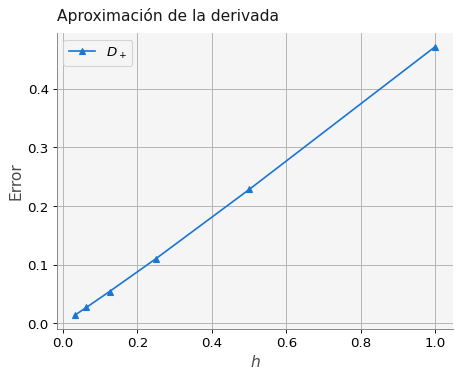

In [14]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.grid()
plt.show()

<a name='3'></a>
## Diferencias finitas hacia atrás (Backward).

$
\displaystyle
\frac{\partial u(x)}{\partial x} \approx \lim\limits_{h\to 0} \frac{u(x) - u(x-h)}{h}
$

La siguiente función de Python implementa la aproximación de **diferencias finitas hacia atrás**.

In [15]:
def backwardFD(u,x,h):
    """ 
    Esquema de diferencias finitas hacia atrás.
    
    Parameters
    ----------
    u : función. 
    Función a evaluar.
    
    x : array
    Lugar(es) donde se evalúa la función
    
    h : array
    Tamaño(s) de la diferencia entre u(x+h) y u(x).
    
    Returns
    -------
    Cálculo de la derivada numérica hacia atrás.
    """
    return (u(x)-u(x-h))/h

<div class="alert alert-success">

## Ejemplo 2.

Tomando como base el ejemplo de diferencias finitas hacia adelante, calcula el error entre la derivada exacta y la aproximación con diferencias finitas hacia atrás usando la fórmula:

$$
Error = || \cos(x) - D_- \sin(x)||
$$

donde $D_-$ representa la aplicación de la fórmula hacia atrás.

</div>

In [16]:
# Calculamos el error entre la derivada exacta y la derivada numérica:
eb = np.fabs( np.cos(x) - backwardFD(np.sin,x,h) )

print(eb)

[0.30116868 0.18378859 0.09902659 0.05111755 0.02593572 0.01305898]


In [18]:
# Agregamos la columna del error de diferencias finitas hacia atrás al DataFrame
Error['$D_-$'] = eb
Error

,$h$,$D_+$,$D_-$
0,1.00000,0.472476,0.301169
1,0.50000,0.228254,0.183789
2,0.25000,0.110248,0.099027
3,0.12500,0.053929,0.051118
4,0.06250,0.026639,0.025936
5,0.03125,0.013235,0.013059


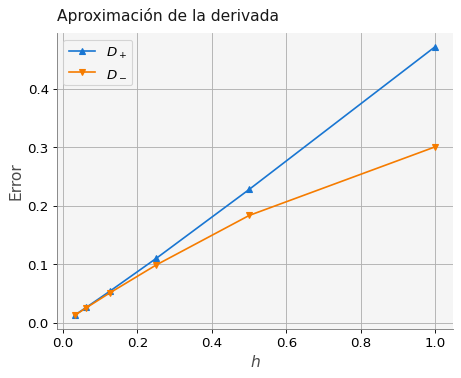

In [19]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.grid()
plt.show()

<a name='4'></a>
## Diferencias finitas centradas.

$
\displaystyle
\frac{\partial u(x)}{\partial x} \approx \lim\limits_{h\to 0} \frac{u(x+h) - u(x-h)}{2h}
$

La siguiente función de Python implementa la aproximación de **diferencias finitas centradas**.

In [21]:
def centeredFD(u,x,h):
    """ 
    Esquema de diferencias finitas centradas.
    
    Parameters
    ----------
    u : función. 
    Función a evaluar.
    
    x : array
    Lugar(es) donde se evalúa la función
    
    h : array
    Tamaño(s) de la diferencia entre u(x+h) y u(x).
    
    Returns
    -------
    Cálculo de la derivada numérica centrada.
    """
    return (u(x+h)-u(x-h))/(2*h)

<div class="alert alert-success">

## Ejemplo 3.

Tomando como base los ejemplos anteriores, calcula el error entre la derivada exacta y la aproximación con diferencias finitas centradas usando la fórmula:

$$
Error = || \cos(x) - D_0 \sin(x)||
$$

donde $D_0$ representa la aplicación de la fórmula de diferencias centradas.

</div>

In [22]:
# Calculamos el error entre la derivada exacta y la derivada numérica:
ec = np.fabs( np.cos(x) - centeredFD(np.sin,x,h) )

print(ec)

[8.56535925e-02 2.22328579e-02 5.61058720e-03 1.40593842e-03
 3.51690617e-04 8.79355346e-05]


In [23]:
# Agregamos la columna del error de diferencias finitas centradas al DataFrame
Error['$D_0$'] = ec

Error

,$h$,$D_+$,$D_-$,$D_0$
0,1.00000,0.472476,0.301169,0.085654
1,0.50000,0.228254,0.183789,0.022233
2,0.25000,0.110248,0.099027,0.005611
3,0.12500,0.053929,0.051118,0.001406
4,0.06250,0.026639,0.025936,0.000352
5,0.03125,0.013235,0.013059,0.000088


Observe que en este caso los errores son varios órdenes de magnitud más pequeños que con $D_+$ y $D_-$. Para hacer una gráfica más representativa usaremos escala `loglog`:

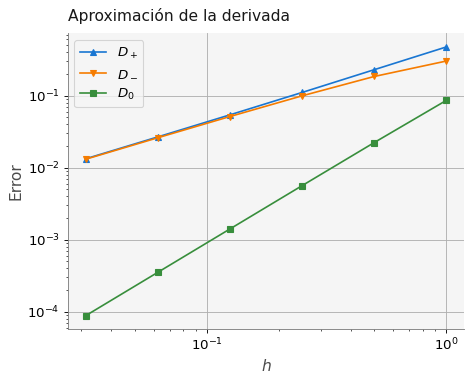

In [24]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.plot(h, ec, 's-', label='$D_0$')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.grid()
plt.loglog()  # Definimos la escala log-log
plt.show()

Como se puede apreciar, la gráfica anterior muestra que la aproximación con diferencias finitas centradas es mejor, pues es de orden cuadrático.

In [25]:
# Guardar los errores en un archivo
Error.to_csv('DF_errores.csv')